<a href="https://colab.research.google.com/github/KirtiNayak11/MultiCancerDetection/blob/main/MultiCancerDetection_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggles
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d obulisainaren/multi-cancer

100% 8.60G/8.62G [00:51<00:00, 58.5MB/s]
100% 8.62G/8.62G [00:51<00:00, 179MB/s] 


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/multi-cancer.zip', 'r')
zip_ref.extractall('/content/drive/MyDrive/ComputerVision/Photos')
zip_ref.close()

In [ ]:
import tensorflow as tf

In [ ]:
import os

In [ ]:
os.makedirs("/content/drive/MyDrive/ComputerVision/Task2",exist_ok=True)

In [ ]:
import shutil

In [ ]:
source_path="/content/drive/MyDrive/ComputerVision/Photos/Multi Cancer/Oral Cancer/oral_scc"
destination_path="/content/drive/MyDrive/ComputerVision/Task2"

if os.path.exists(source_path):
  if not os.path.exists(destination_path):
    os.makedirs("destination_path")
  shutil.move(source_path,destination_path)
else:
  print("path doesn't exist")


In [ ]:
data_dir="/content/drive/MyDrive/ComputerVision/Task2"

In [ ]:
import os
class_counts = {}
for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        class_counts[class_name] = num_images

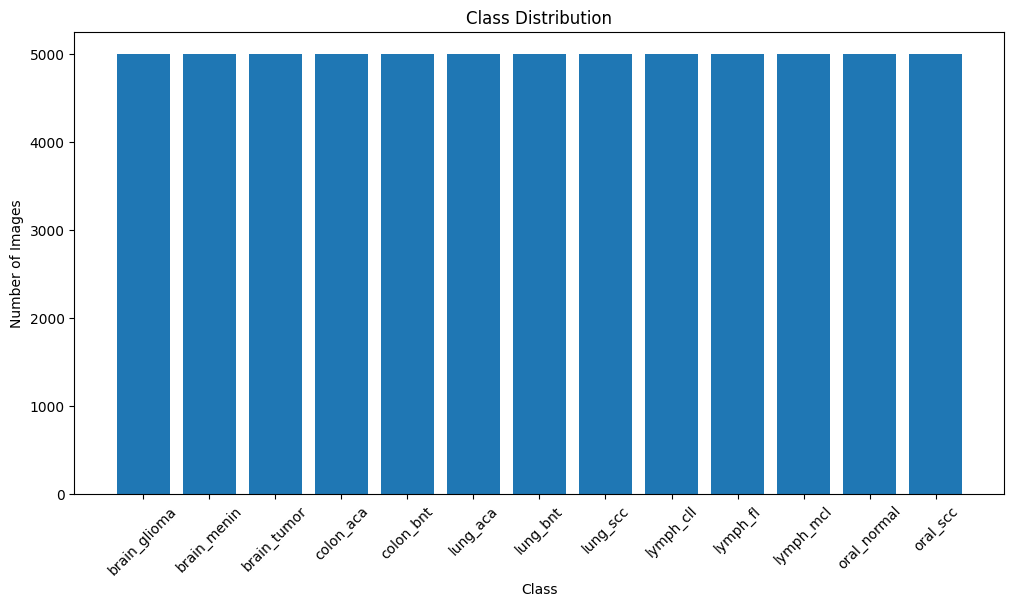

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Create the dataset from the specified subdirectories
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/ComputerVision/Task2",
    #labels='inferred',  # Automatically infer labels from subdirectory structure
   # class_names=Task1,  # Specify the included subdirectories
    image_size=(48, 48),
    batch_size=16,
    seed=123,
    shuffle=True,
    label_mode="categorical"
)

Found 65002 files belonging to 13 classes.


In [ ]:
class_names = dataset.class_names
class_names

['brain_glioma',
 'brain_menin',
 'brain_tumor',
 'colon_aca',
 'colon_bnt',
 'lung_aca',
 'lung_bnt',
 'lung_scc',
 'lymph_cll',
 'lymph_fl',
 'lymph_mcl',
 'oral_normal',
 'oral_scc']

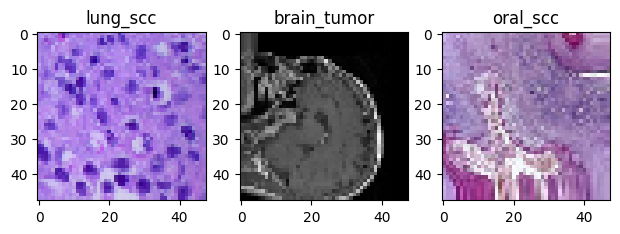

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(3):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        label_index = tf.where(labels_batch[i] == 1).numpy()[0][0]  # Find the index where label is 1
        plt.title(class_names[label_index])
        #plt.axis("off")

plt.show()

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.7,val_split=0.15,test_split=0.15, shuffle=False, shuffle_size=500):
    assert (train_split + val_split + test_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [ ]:
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1.0 / 255.0)

In [ ]:
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

In [ ]:
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

In [ ]:
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

In [ ]:
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(11) # It's my lucky number
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
import itertools

import keras

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
#from keras.layers.normalization import BatchNormalization

from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

#from keras.applications.resnet50 import ResNet50
from keras import backend as K
from tensorflow import keras
from tensorflow.keras import layers, models
import cv2
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.optimizers import SGD

In [ ]:
base_model = DenseNet121(weights='imagenet', include_top=False)
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
predictions=Dense(13,activation='softmax')(x)

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
model=Model(inputs=base_model.input,outputs=predictions)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history2=model.fit(train_ds,epochs=5,batch_size=16,validation_data=val_ds,callbacks=[early_stopping])

Epoch 1/5
2844/2844 [==============================] - 1476s 509ms/step - loss: 0.5561 - accuracy: 0.7824 - val_loss: 0.2263 - val_accuracy: 0.9107
Epoch 2/5
2844/2844 [==============================] - 1474s 518ms/step - loss: 0.2729 - accuracy: 0.8968 - val_loss: 0.1610 - val_accuracy: 0.9393
Epoch 3/5
2844/2844 [==============================] - 1445s 508ms/step - loss: 0.1779 - accuracy: 0.9342 - val_loss: 0.1441 - val_accuracy: 0.9494
Epoch 4/5
2844/2844 [==============================] - 1253s 440ms/step - loss: 0.1324 - accuracy: 0.9524 - val_loss: 0.1206 - val_accuracy: 0.9575
Epoch 5/5
2844/2844 [==============================] - 1275s 448ms/step - loss: 0.1090 - accuracy: 0.9618 - val_loss: 0.0825 - val_accuracy: 0.9679


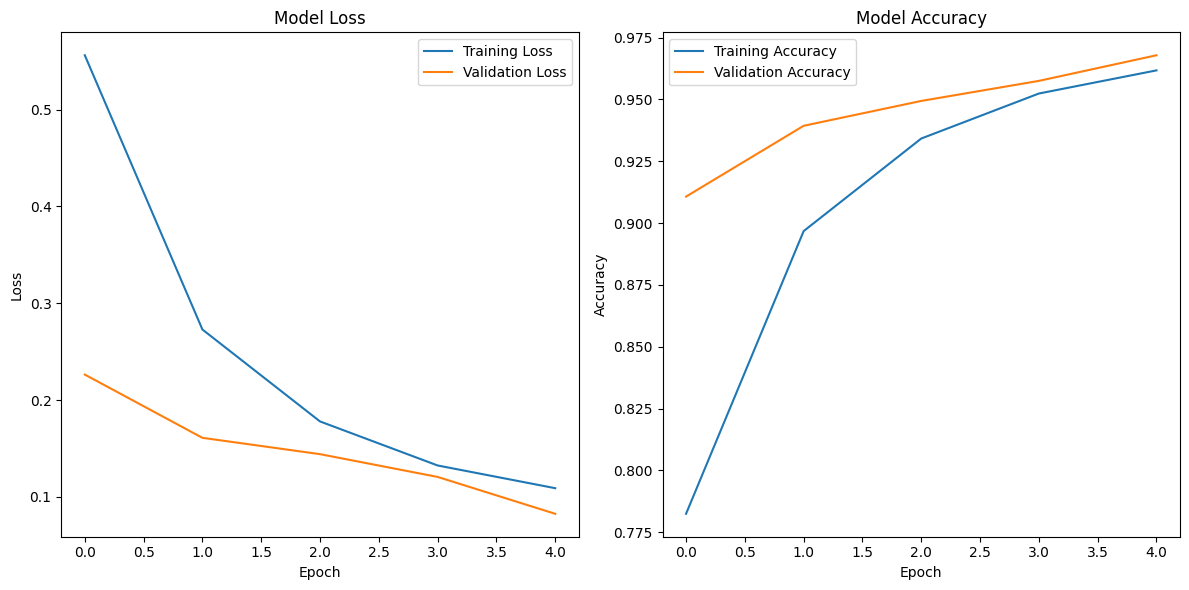

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Evaluate the model on the test dataset
test_results = model.evaluate(test_ds)

# Print the test results (e.g., loss and accuracy)
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])

610/610 [==============================] - 163s 109ms/step - loss: 0.0927 - accuracy: 0.9666
Test Loss: 0.0927327573299408
Test Accuracy: 0.9665778279304504


In [ ]:
import numpy as np

1/1 [==============================] - 2s 2s/step
actual label: lymph_mcl
predicted label: lymph_mcl


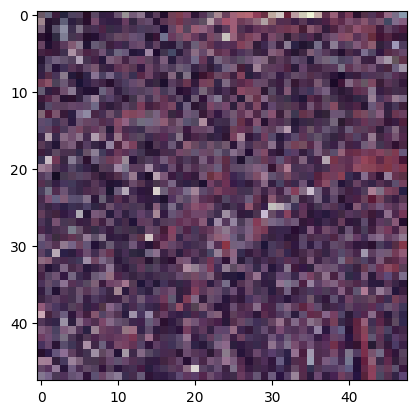

In [ ]:
for images, labels in test_ds.take(1):
        for i in range(1):
            image = images[i]
            actual_label = tf.argmax(labels[i]).numpy()

            plt.imshow(image)

            predictedValue = model.predict(np.expand_dims(image, axis=0))
            predicted_label = np.argmax(predictedValue)

            print("actual label:", class_names[actual_label])
            print("predicted label:", class_names[predicted_label])


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Assuming you have true labels for the test dataset in a separate list
true_labels = []  # Replace this with your true labels

# Collect the predicted labels using model.predict
predicted_labels = []

for image_batch, labels_batch in test_ds:
    n= image_batch.shape[0]

    for i in range(n):
      batch_prediction = model.predict(np.expand_dims(image_batch[i], axis=0))
      predicted_indices_batch = np.argmax(batch_prediction)
      predicted_labels.append(predicted_indices_batch)

      label_index = tf.where(labels_batch[i] == 1).numpy()[0][0]
      true_labels.append(label_index)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 34ms/step


In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[743  15   1   0   0   0   0   0   0   0   0   0   0]
 [ 16 736  14   0   0   0   0   0   0   0   0   0   0]
 [  6  11 737   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 741  11  16   0   0   0   0   0   0   0]
 [  0   0   0   0 717   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 718   0  11   0   0   0   0   0]
 [  0   0   0   0   0   4 727   0   0   0   0   0   0]
 [  0   0   0   0   0  33   0 711   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 725   6   4   0   0]
 [  0   0   0   0   0   0   0   0   2 769   5   0   0]
 [  0   0   0   0   0   0   0   0  24  26 728   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 641 106]
 [  0   0   0   0   0   0   0   1   0   0   0  18 731]]


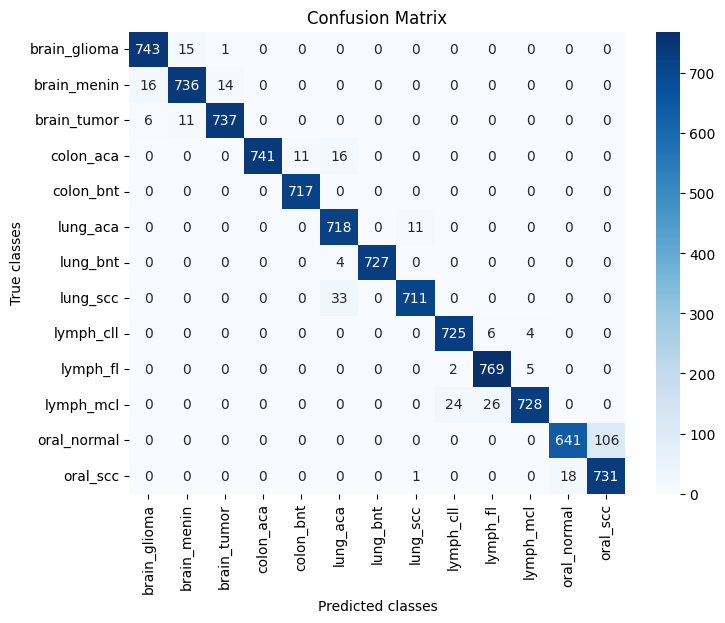

In [ ]:
import seaborn as sns
# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted classes')
plt.ylabel('True classes')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming y_true is the true labels and y_pred is the predicted labels for a multiclass problem
accuracy = accuracy_score(true_labels, predicted_labels)

# Specify the 'average' parameter for precision, recall, and f1_score
precision = precision_score(true_labels, predicted_labels, average='weighted')  # You can use 'micro', 'macro', or 'weighted'
recall = recall_score(true_labels, predicted_labels, average='weighted')  # You can use 'micro', 'macro', or 'weighted'
f1 = f1_score(true_labels, predicted_labels, average='weighted')  # You can use 'micro', 'macro', or 'weighted'
conf_matrix = confusion_matrix(true_labels, predicted_labels)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9661677260611031
Precision: 0.9674356442039244
Recall: 0.9661677260611031
F1-Score: 0.966126651173856
Confusion Matrix:
[[743  15   1   0   0   0   0   0   0   0   0   0   0]
 [ 16 736  14   0   0   0   0   0   0   0   0   0   0]
 [  6  11 737   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 741  11  16   0   0   0   0   0   0   0]
 [  0   0   0   0 717   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 718   0  11   0   0   0   0   0]
 [  0   0   0   0   0   4 727   0   0   0   0   0   0]
 [  0   0   0   0   0  33   0 711   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 725   6   4   0   0]
 [  0   0   0   0   0   0   0   0   2 769   5   0   0]
 [  0   0   0   0   0   0   0   0  24  26 728   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 641 106]
 [  0   0   0   0   0   0   0   1   0   0   0  18 731]]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Assuming 'model' is your trained model
# Save the entire model including architecture, optimizer, and learned weights
model.save("/content/drive/MyDrive/ComputerVision/Task2_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
